In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [5]:
steam = pd.read_csv('steam.csv')
reviu = pd.read_csv('reviuws.csv')

### REVIEWS


In [6]:
# Revisamos el dataset
reviu.head()

,Unnamed: 0,funny,last_edited,item_id,helpful,recommend,user_id,user_url,sentiment_analisy,date
0,0,NaN,NaN,1250,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2,2011-11-05
1,1,NaN,NaN,22200,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2,2011-07-15
2,2,NaN,NaN,43110,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2,2011-04-21
3,3,NaN,NaN,251610,15 of 20 people (75%) found this review helpful,True,js41637,http://steamcommunity.com/id/js41637,2,2014-06-24
4,4,NaN,NaN,227300,0 of 1 people (0%) found this review helpful,True,js41637,http://steamcommunity.com/id/js41637,0,2013-09-08


In [8]:
reviu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         59305 non-null  int64 
 1   funny              8151 non-null   object
 2   last_edited        6140 non-null   object
 3   item_id            59305 non-null  int64 
 4   helpful            59305 non-null  object
 5   recommend          59305 non-null  bool  
 6   user_id            59305 non-null  object
 7   user_url           59305 non-null  object
 8   sentiment_analisy  59305 non-null  int64 
 9   date               59305 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 4.1+ MB


In [12]:
# verificamos los nulos 
reviu.isnull().sum()

Unnamed: 0           0
item_id              0
helpful              0
recommend            0
user_id              0
user_url             0
sentiment_analisy    0
date                 0
dtype: int64

In [11]:
#Elminamos las columnas con los nulos
reviu = reviu.drop(['funny','last_edited'], axis=1)

In [22]:
reviu[['sentiment_analisy','recommend']].head()

,sentiment_analisy,recommend
0,2,True
1,2,True
2,2,True
3,2,True
4,0,True


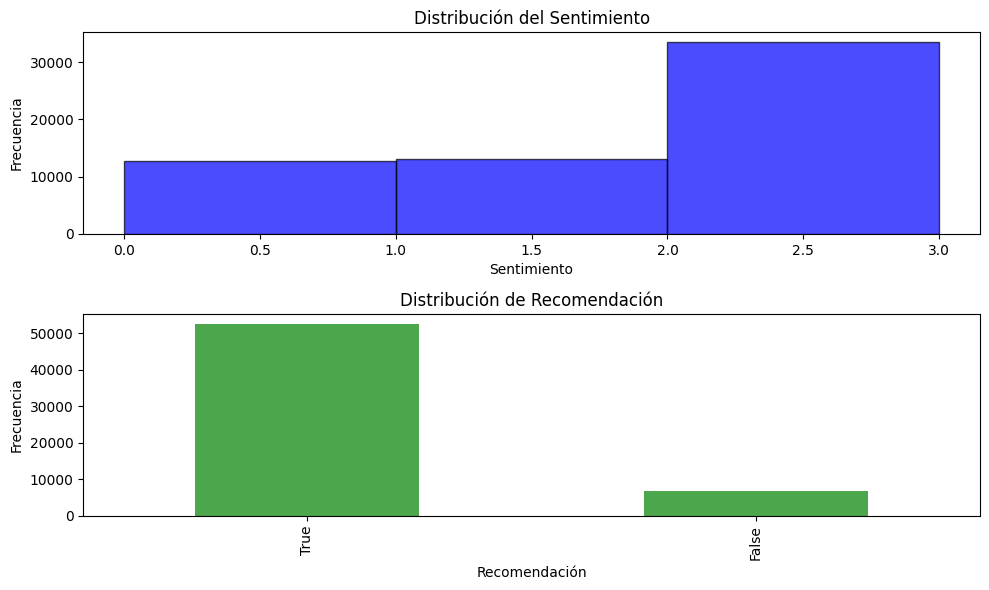

In [21]:
# Se realiza una distribuccion con los campos sentiment_analisy y recommend
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar el sentimiento (sentiment_analisy)
plt.subplot(2, 1, 1)
plt.hist(reviu['sentiment_analisy'], bins=[0, 1, 2, 3], alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución del Sentimiento')

# Graficar la recomendación (recommend)
plt.subplot(2, 1, 2)
reviu['recommend'].value_counts().plot(kind='bar', alpha=0.7, color='green')
plt.xlabel('Recomendación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Recomendación')

plt.tight_layout()
plt.show()

In [14]:
#Observamos los campos tracedentes de el dataframe reviu
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = reviu.groupby(['sentiment_analisy', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(reviu)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analisy recommend                      
0                 False          3366    5.675744
                  True           9380   15.816542
1                 False          1505    2.537729
                  True          11523   19.430065
2                 False          1961    3.306635
                  True          31570   53.233286

In [17]:
# La cantidad de usuarios que dieron su opinion
Usuarios=len(reviu['user_id'].unique())
Usuarios


25458

In [ ]:
# Los datos a destacar en esta relacion, se puede decir que mas del 50% de los comentarios positivos
# recomendaron el juego y ademas menos del 4% no lo recomendan.
# Si bien hubo casi 13mil comentarios negativos respecto a juegos, se observa que aproximadamente el 16%
# lo recomiendan. 

In [23]:
# Chekeemos el date
reviu['date'].head()

0    2011-11-05
1    2011-07-15
2    2011-04-21
3    2014-06-24
4    2013-09-08
Name: date, dtype: object

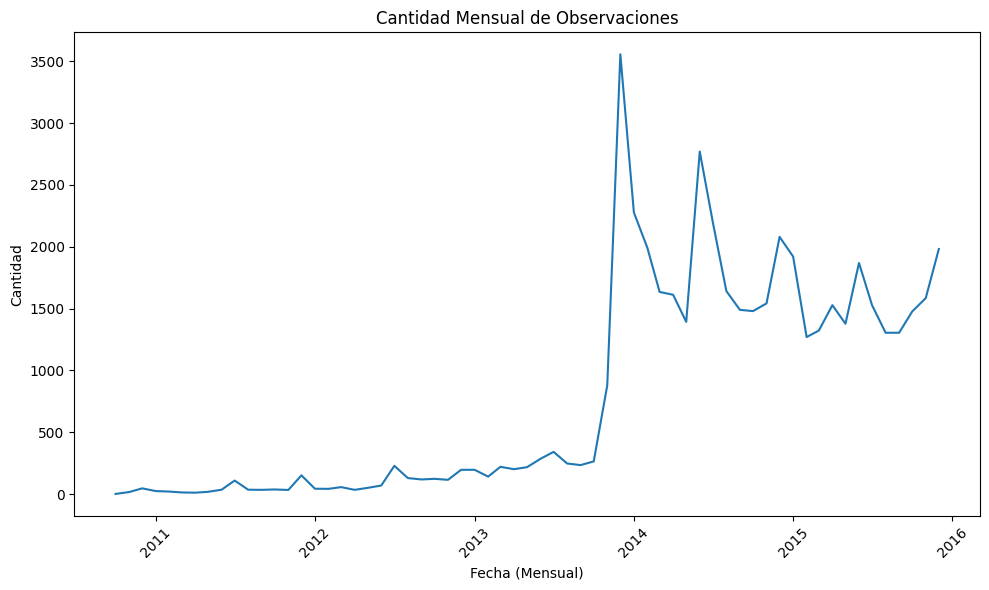

In [29]:
# Se grafica los reviews mensuales durante los años comprendidos de la data

# Filtrar y eliminar las filas con valores de fecha inválidos
reviu = reviu[reviu['date'].astype(str).str.match(r'\d{4}-\d{2}-\d{2}')]

# Convertir la columna 'date' a objetos de fecha
reviu['date'] = pd.to_datetime(reviu['date'])

# Agrupar por mes y contar la cantidad de observaciones
monthly_count = reviu.groupby(reviu['date'].dt.to_period("M")).size().reset_index(name='count')

# Convertir los períodos a objetos de fecha
monthly_count['date'] = monthly_count['date'].dt.to_timestamp()

# Graficar usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='count', data=monthly_count)
plt.xlabel('Fecha (Mensual)')
plt.ylabel('Cantidad')
plt.title('Cantidad Mensual de Observaciones')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()
plt.show()


In [ ]:
# Observamos el comportamiento de la cantidad de reviews, atraves de los años, donde se destaca 
#que entre 2011 a 2013 se mantiene constante y aparatir de 2014 la cantidad aumenta en este año con la
# la mayor cantidad de registros.  

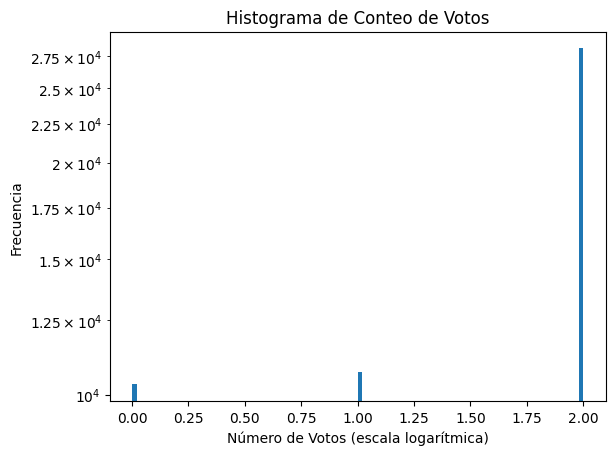

In [51]:
# Generar el histograma con escala logarítmica y 100 bins
plt.hist(reviu['sentiment_analisy'], log=True, bins=100)

# Etiqueta del eje x
plt.xlabel('Número de Votos (escala logarítmica)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Conteo de Votos')

# Mostrar el histograma
plt.show()

### GAMES

In [30]:
steam.head()

,Unnamed: 0,id,genres,app_name,release_date,year
0,88310,761140,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-01,2018
1,88311,643980,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-01,2018
2,88312,670290,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-01-01,2017
3,88313,767400,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-01-01,2017
4,88315,772540,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018-01-01,2018


In [ ]:
# En steam esta compuesto por datos respecto a los juegos tales como su id, el genero , nombre y la fecha

In [31]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28728 entries, 0 to 28727
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    28728 non-null  int64 
 1   id            28728 non-null  int64 
 2   genres        28728 non-null  object
 3   app_name      28728 non-null  object
 4   release_date  28728 non-null  object
 5   year          28728 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
# La cantidad de juegos registrados son de 28728

In [34]:
steam['genres'] = steam['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [35]:
steam = steam.explode('genres')

In [45]:
steam['genres'].unique()

array(['Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing',
       'Massively Multiplayer', 'Early Access',
       'Animation &amp; Modeling', 'Video Production', 'Web Publishing',
       'Education', 'Software Training', 'Utilities',
       'Design &amp; Illustration', 'Audio Production', 'Photo Editing',
       'Accounting'], dtype=object)

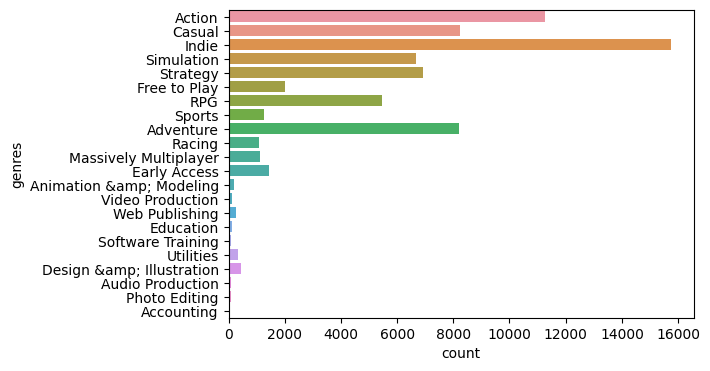

In [36]:
# Se grafica eñ campo 'genres'
plt.figure(figsize=(6, 4))
sns.countplot(data=steam, y='genres', orient='h')
plt.show()

In [ ]:
# Los datos de juegos sumnistrados, obtienen un total de 22 generos de los cuales 'indie' 
# es el genero de mayor presencia y seguido por 'Action','Casual' y 'Aventure'
# ademas se refleja 'Accounting' como el de menor cantidad. 

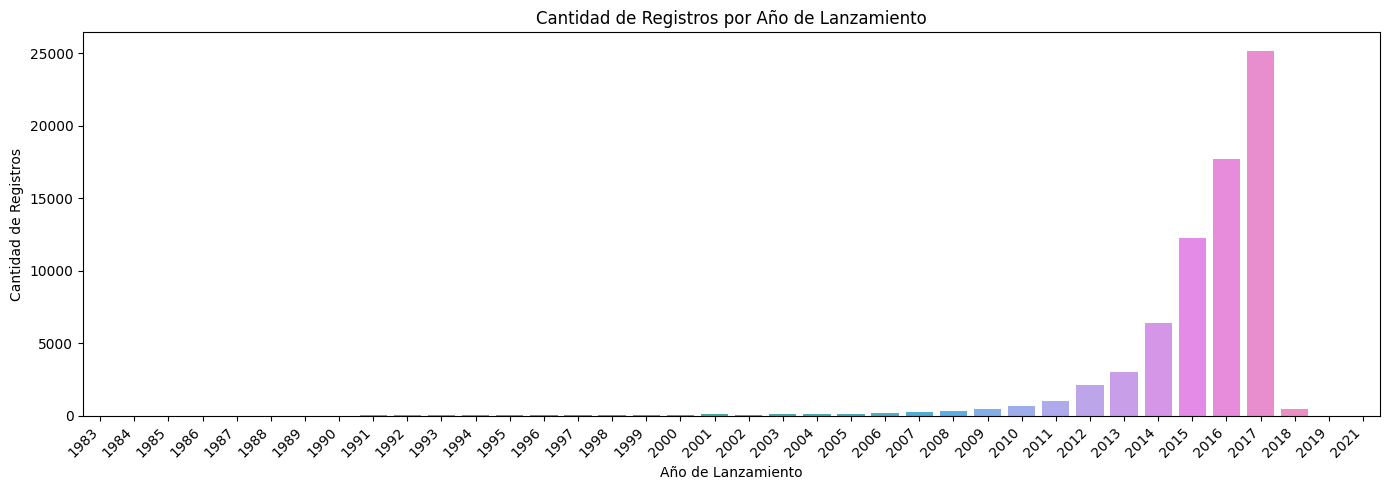

In [46]:
# Cuenta la frecuencia de cada año
conteo_anios = steam['year'].value_counts()

# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

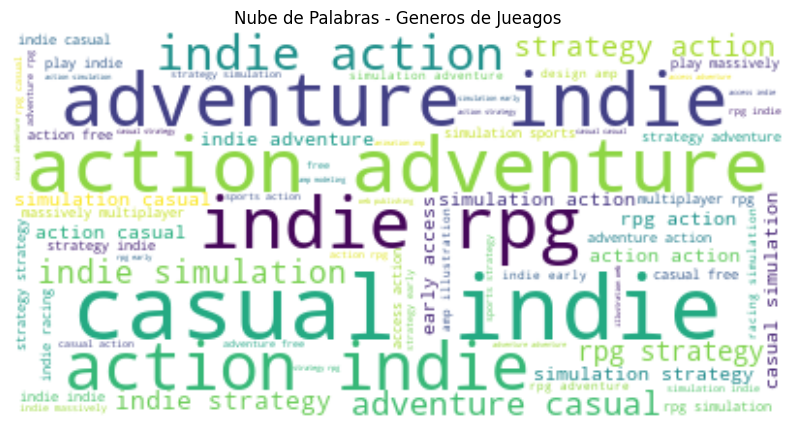

In [50]:
from wordcloud import WordCloud
title_words = ' '.join(steam['genres'])
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Generos de Jueagos')
plt.show()

In [ ]:
#La nube de palabras nos muestra las palabras que mas resaltan en el dataset, en donde 'indie', es 
# la de mayor frecuencia de aparicion, es importante debido que se puede establecer una similitud
# a la hora de recomendar un juego